In [3]:
#Library imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [39]:
# Define column names as they appear in the data file
column_names = ["Symboling", "Normalized-losses", "Make", "Fuel-type", "Aspiration","Num-of-doors", "Body-style", "Drive-wheels", "Engine-location","Wheel-base", "Length", "Width", "Height", "Curb-weight","Engine-type", "Num-of-cylinders", "Engine-size", "Fuel-system","Bore", "Stroke", "Compression-ratio", "Horsepower", "Peak-rpm","City-mpg", "Highway-mpg", "Price"]

cell_df = pd.read_csv("imports-85.data", names=column_names, na_values="?")
cell_df = cell_df.dropna()
cell_df.columns = cell_df.columns.str.strip()

# Verify the DataFrame columns after loading
print("Columns in DataFrame after loading and cleaning:")
print(cell_df.columns)

Columns in DataFrame after loading and cleaning:
Index(['Symboling', 'Normalized-losses', 'Make', 'Fuel-type', 'Aspiration',
       'Num-of-doors', 'Body-style', 'Drive-wheels', 'Engine-location',
       'Wheel-base', 'Length', 'Width', 'Height', 'Curb-weight', 'Engine-type',
       'Num-of-cylinders', 'Engine-size', 'Fuel-system', 'Bore', 'Stroke',
       'Compression-ratio', 'Horsepower', 'Peak-rpm', 'City-mpg',
       'Highway-mpg', 'Price'],
      dtype='object')


In [40]:
# Explore initial data overview
print(cell_df.describe())
print(cell_df.info())
print(cell_df.isnull().sum())  # Check for missing values

        Symboling  Normalized-losses  Wheel-base      Length       Width  \
count  159.000000         159.000000  159.000000  159.000000  159.000000   
mean     0.735849         121.132075   98.264151  172.413836   65.607547   
std      1.193086          35.651285    5.167416   11.523177    1.947883   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  165.650000   64.000000   
50%      1.000000         113.000000   96.900000  172.400000   65.400000   
75%      2.000000         148.000000  100.800000  177.800000   66.500000   
max      3.000000         256.000000  115.600000  202.600000   71.700000   

           Height  Curb-weight  Engine-size        Bore      Stroke  \
count  159.000000   159.000000   159.000000  159.000000  159.000000   
mean    53.899371  2461.138365   119.226415    3.300126    3.236352   
std      2.268761   481.941321    30.460791    0.267336    0.294888   
min     49.400000  1488.000000 

In [47]:
# Define categorical, numerical, and ordinal features
categorical_features = [
    'Fuel-system', 'Num-of-cylinders', 'Engine-type', 'Engine-location',
    'Drive-wheels', 'Body-style', 'Aspiration', 'Fuel-type', 'Make'
]
numerical_features = [
    'Highway-mpg', 'City-mpg', 'Peak-rpm', 'Horsepower', 'Compression-ratio',
    'Stroke', 'Bore', 'Engine-size', 'Curb-weight', 'Height', 'Width',
    'Length', 'Wheel-base', 'Normalized-losses'
]
ordinal_features = ['Num-of-doors']

# Ensure all columns are correctly loaded
print("Columns in cell_df:", cell_df.columns.tolist())

# Check for any missing categorical features
missing_categorical_features = [col for col in categorical_features if col not in cell_df.columns]
if missing_categorical_features:
    print("Warning: The following categorical features are missing in cell_df:", missing_categorical_features)
else:
    # Apply one-hot encoding to categorical features
    cell_df = pd.get_dummies(cell_df, columns=categorical_features)
    print("One-hot encoding successful. DataFrame shape after encoding:", cell_df.shape)

# Check for any missing ordinal features
missing_ordinal_features = [col for col in ordinal_features if col not in cell_df.columns]
if missing_ordinal_features:
    print("Warning: The following ordinal features are missing in cell_df:", missing_ordinal_features)
else:
    # Apply ordinal encoding to ordinal features
    from sklearn.preprocessing import OrdinalEncoder
    ordinal_encoder = OrdinalEncoder()
    cell_df[ordinal_features] = ordinal_encoder.fit_transform(cell_df[ordinal_features])
    print("Ordinal encoding successful.")


Columns in cell_df: ['Symboling', 'Normalized-losses', 'Num-of-doors', 'Wheel-base', 'Length', 'Width', 'Height', 'Curb-weight', 'Engine-size', 'Bore', 'Stroke', 'Compression-ratio', 'Horsepower', 'Peak-rpm', 'City-mpg', 'Highway-mpg', 'Price', 'Fuel-system_1bbl', 'Fuel-system_2bbl', 'Fuel-system_idi', 'Fuel-system_mfi', 'Fuel-system_mpfi', 'Fuel-system_spdi', 'Num-of-cylinders_eight', 'Num-of-cylinders_five', 'Num-of-cylinders_four', 'Num-of-cylinders_six', 'Num-of-cylinders_three', 'Engine-type_dohc', 'Engine-type_l', 'Engine-type_ohc', 'Engine-type_ohcf', 'Engine-type_ohcv', 'Engine-location_front', 'Drive-wheels_4wd', 'Drive-wheels_fwd', 'Drive-wheels_rwd', 'Body-style_convertible', 'Body-style_hardtop', 'Body-style_hatchback', 'Body-style_sedan', 'Body-style_wagon', 'Aspiration_std', 'Aspiration_turbo', 'Fuel-type_diesel', 'Fuel-type_gas', 'Make_audi', 'Make_bmw', 'Make_chevrolet', 'Make_dodge', 'Make_honda', 'Make_jaguar', 'Make_mazda', 'Make_mercedes-benz', 'Make_mitsubishi', 'M

In [42]:
#Defining what we want to predict  and features
X = cell_df.drop(columns=['Symboling'])  
y = cell_df['Symboling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Feature Normalization for numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check unique values in y_train
print("Unique values in y_train:", y_train.unique())


Unique values in y_train: [ 3  1 -1  0  2 -2]


In [44]:
#Implementing the SVR model
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=10, gamma=0.01)
svr_model.fit(X_train, y_train)

# Predict on test data
y_pred = svr_model.predict(X_test)

Mean Squared Error: 0.30180904616888976
R-squared: 0.7943762719381616
Cross-validation MSE scores for each fold: [-0.48226491 -0.42621479 -0.37032624 -0.35956427 -0.76987246]
Average cross-validation MSE score: -0.48164853430679494


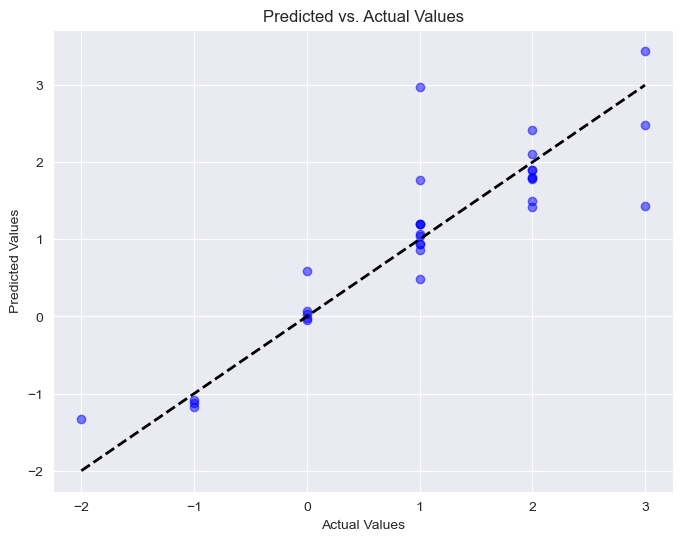

In [45]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation with a regression metric
cv_scores = cross_val_score(svr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print the individual fold scores and the average score
print("Cross-validation MSE scores for each fold:", cv_scores)
print("Average cross-validation MSE score:", cv_scores.mean())


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()